In [1]:
import numpy as np

from dijkstra import Network

distance_matrix = np.array(
    [[0.0, 4.0, 0.0, 2.0, 0.0],
     [0.0, 0.0, 5.0, 0.0, 0.0],
     [0.0, 0.0, 0.0, 0.0, 3.0],
     [0.0, 1.0, 0.0, 0.0, 6.0],
     [0.0, 0.0, 0.0, 0.0, 0.0]]
)
node_names = list("ABCDE")

In [2]:
network = Network(distance_matrix,node_names)

In [3]:
network.get_shortest_distances(0)

{'A': 0.0, 'B': 3.0, 'C': 8.0, 'D': 2.0, 'E': 8.0}

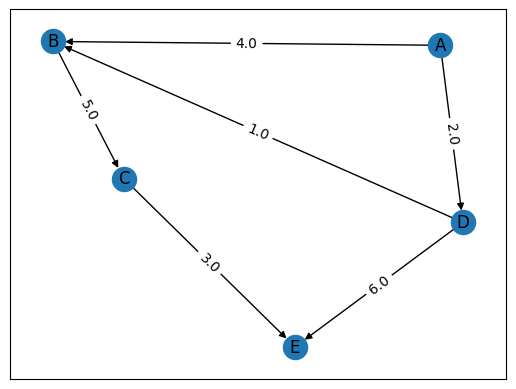

In [4]:
network.draw_graph()

# Learning how to draw graphs in python

In [5]:
import networkx as nx

{('A', 'B'): Text(-0.6515151742208353, 0.5381632576291462, '4.0'),
 ('A', 'D'): Text(-0.4521089065029175, -0.04257188534680814, '2.0'),
 ('B', 'C'): Text(-0.047891093497083814, 0.4228530471739842, '5.0'),
 ('C', 'E'): Text(0.6441685802636669, -0.33332376729210406, '3.0'),
 ('D', 'B'): Text(-0.18471307980358362, 0.17105616230186974, '1.0'),
 ('D', 'E'): Text(0.5073465939571671, -0.5851206521642185, '6.0')}

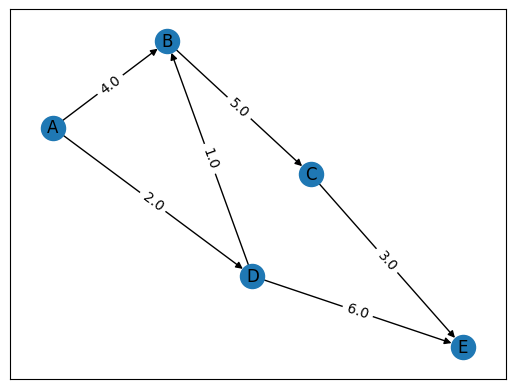

In [6]:
G = nx.DiGraph(distance_matrix)
G = nx.relabel_nodes(G,{n:name for n,name in zip(range(5),node_names)})
pos=nx.spring_layout(G) # pos = nx.nx_agraph.graphviz_layout(G)
nx.draw_networkx(G,pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)